# Map Search
## bfs and dfs

In [ ]:
BEIJING,SHENZHEN,XIAMEN,XIANGGANG,SHANGHAI,HANGZHOU,NINGBO,ZHENGZHOU = 
"""BEIJING SHENZHEN XIAMEN XIANGGANG SHANGHAI HANGZHOU NINGBO ZHNGZHOU""".split()

In [37]:
dictionary = {}

In [38]:
connection = {
    SHENZHEN:[HANGZHOU,NINGBO,ZHENGZHOU],
    XIAMEN:[XIANGGANG,BEIJING,HANGZHOU],
    XIANGGANG:[BEIJING,SHANGHAI],
    SHANGHAI:[BEIJING,SHENZHEN],
    HANGZHOU:[BEIJING,XIAMEN,XIANGGANG],
    NINGBO:[BEIJING],
    BEIJING:[SHANGHAI,NINGBO,SHENZHEN,ZHENGZHOU],
    ZHENGZHOU:[BEIJING,HANGZHOU]
    
}

In [39]:
import networkx as nx#???

In [40]:
%matplotlib inline

In [41]:
graph = connection

In [42]:
g = nx.Graph(graph)

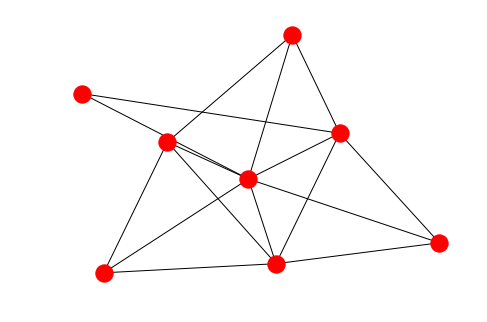

In [43]:
nx.draw(g)

In [44]:
def nagivator(start,end,flight_graph):
    '''start 出发地;end 目的地;connection_graph航线地图？'''
    pathes = [[start]]
    seen = set()
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in seen: continue
        successors = flight_graph[froniter]#该地航班情况
        for s in successors:
            if s==end:
                path.append(s)
                return path
            else :
                pathes.append(path+[s])
       # print(pathes)
        pathes = sorted(pathes,key=len)
        seen.add(froniter)

In [45]:
pathes = nagivator(NINGBO,HANGZHOU,connection)

In [46]:
print(pathes)

['NINGBO', 'BEIJING', 'SHENZHEN', 'HANGZHOU']


In [47]:
def nagivator_bfs(start,end,flight_graph):
    pathes = [start]
    seen = set()
    while pathes:
        froniter = pathes.pop(0)
        if froniter in seen:continue
        successors = flight_graph[froniter]
        #print(successors)
        print('standing on {} Looking forward{}'.format(froniter,successors))
        pathes = pathes + successors #广度优先
        seen.add(froniter)

In [48]:
nagivator_bfs(NINGBO,HANGZHOU,connection)

standing on NINGBO Looking forward['BEIJING']
standing on BEIJING Looking forward['SHANGHAI', 'NINGBO', 'SHENZHEN', 'ZHNGZHOU']
standing on SHANGHAI Looking forward['BEIJING', 'SHENZHEN']
standing on SHENZHEN Looking forward['HANGZHOU', 'NINGBO', 'ZHNGZHOU']
standing on ZHNGZHOU Looking forward['BEIJING', 'HANGZHOU']
standing on HANGZHOU Looking forward['BEIJING', 'XIAMEN', 'XIANGGANG']
standing on XIAMEN Looking forward['XIANGGANG', 'BEIJING', 'HANGZHOU']
standing on XIANGGANG Looking forward['BEIJING', 'SHANGHAI']


In [49]:
def nagivator_dfs(start,end,flight_graph):
    pathes = [start]
    seen = set()
    while pathes:
        froniter = pathes.pop(0)
        if froniter in seen:continue
        successors = flight_graph[froniter]
        print('standing on {} Looking forward{}'.format(froniter,successors))
        pathes = successors + pathes #深度优先
        seen.add(froniter)

In [51]:
nagivator_dfs(NINGBO,HANGZHOU,connection)

standing on NINGBO Looking forward['BEIJING']
standing on BEIJING Looking forward['SHANGHAI', 'NINGBO', 'SHENZHEN', 'ZHNGZHOU']
standing on SHANGHAI Looking forward['BEIJING', 'SHENZHEN']
standing on SHENZHEN Looking forward['HANGZHOU', 'NINGBO', 'ZHNGZHOU']
standing on HANGZHOU Looking forward['BEIJING', 'XIAMEN', 'XIANGGANG']
standing on XIAMEN Looking forward['XIANGGANG', 'BEIJING', 'HANGZHOU']
standing on XIANGGANG Looking forward['BEIJING', 'SHANGHAI']
standing on ZHNGZHOU Looking forward['BEIJING', 'HANGZHOU']


# Sentence Generation

这是一个随机生成句子的方法。
这里假设完整的一个句子是由noun_phrase和verb_phrase构成
一个noun_phrase由(article)(adj1)(adj2)(...)(noun)的形式构成，即冠词+形容词（可多个也可以没有）+名词
一个verb_phrease由verb/noun_phrase构成，动词+冠词+形容词（可多个也可以没有）+名词
综上：
具体展开一个句子的生成规则：
冠词+形容词（可多个也可以没有）+名词+ 动词+ 冠词+形容词（可多个也可以没有）+名词


In [53]:
import random

In [60]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [61]:
def grammar_parse(grammar_str,sep='=>'):
    '''返回语法字典'''
    grammar = {}
    for line in grammar_str.split('\n'):
        line = line.strip()
        if not line: continue
        target,rules = line.split(sep)
        grammar[target.strip()]=[r.split() for r in rules.split('|')]
    return grammar

In [62]:
def gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed: return target
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed,target = r) for r in rule if r != 'null')

In [63]:
grammar_parsed = grammar_parse(grammar)

In [64]:
grammar_parsed

{'Adj': [['蓝色的'], ['好看的'], ['小小的']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'sentence': [['noun_phrase', 'verb_phrase']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'verb_phrase': [['verb', 'noun_phrase']]}

In [66]:
for i in range(10):
    print(gene(grammar_parsed))

一个好看的桌子坐在一个桌子
一个小小的桌子坐在一个蓝色的桌子
一个女人看着这个好看的小小的小小的蓝色的蓝色的小小的蓝色的桌子
这个小猫听着一个小猫
这个好看的桌子听着这个蓝色的桌子
一个小猫看着这个好看的篮球
一个篮球听着一个女人
这个蓝色的好看的好看的蓝色的桌子坐在一个蓝色的蓝色的小小的蓝色的女人
一个好看的蓝色的篮球看见这个蓝色的好看的好看的篮球
一个小小的蓝色的好看的小小的好看的小小的小小的小猫看见这个蓝色的小猫


In [67]:
decimal_grammar = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

In [68]:
decimal_parsed = grammar_parse(decimal_grammar,sep = '=')

In [69]:
decimal_parsed

{'expression': [['operator', 'op', 'operator']],
 'num': [['0'],
  ['1'],
  ['2'],
  ['3'],
  ['4'],
  ['5'],
  ['6'],
  ['7'],
  ['8'],
  ['9'],
  ['num', 'num']],
 'op': [['+'], ['-'], ['*'], ['/']],
 'operator': [['num', 'op', 'num']]}

In [71]:
for i in range(10):
    print(gene(decimal_parsed,target= 'expression'))

3*4/3*2
5/8/3+6
5/2+9/9
2*4-9-8
78+5*3/1
2-5/4/6
4-8*7-6
5*1*3/1
1-8+2/1
4-2-3/2
